
# Openscapes Cohort 2023 - Geoweaver FAIRable and Tangible Workflow Demo

PyGeoweaver package is a Python wrapper of the `GeoWeaver`. This package is designed for Jupyter users to be able to directly use Geoweaver in Jupyter notebook or JupyterLab (JupyterHub).
## 1. Installing PyGeoweaver
You can either install pygeoweaver using `pip` or build from `source`


In [21]:
!pip install pygeoweaver

The `gw.start()` function starts the Geoweaver Application on background to serve requests

In [23]:
import pygeoweaver as gw
gw.start()

Stop running Geoweaver if any..
Check Java..
Start Geoweaver..
Success: Geoweaver is up


## 2. Reset Passwords (optional if you already did)

This password will be used to authenticate the process runs on `localhost` (a.k.a the default host with id `100001`).

In [25]:
gw.reset_password()

Enter password:  ········
Re-enter password:  ········


NOTE: Password updated.


## 3. Import Workflow : Earthdata Cloud Clinic

This tutorial from Cloud cookbook uses two different direct cloud access & subsetting options available in the Earthdata Cloud. 
* The `earthaccess` python library for data search and direct cloud access, followed by `xarray` subsetting
* The `Harmony-py` python library for direct cloud access & data subsetting

The workflow for earthdata cloud clinic for geoweaver is hosted at [`https://github.com/earth-artificial-intelligence/earth_data_cloud_clinic_geoweaver`](https://github.com/earth-artificial-intelligence/earth_data_cloud_clinic_geoweaver)



In [31]:
import os
import urllib.request
from IPython.display import Image

home_dir = os.path.expanduser('~')
file_url = "https://github.com/earth-artificial-intelligence/earth_data_cloud_clinic_geoweaver/archive/refs/tags/v0.0.6.zip"
file_path = os.path.join(home_dir, "kr2novmm4i9i27z5adyj.zip")

urllib.request.urlretrieve(file_url, file_path)

gw.import_workflow(file_path)

Unzipping /Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj.zip to /Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/.DS_Store
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/README.md
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/code/
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/code/earth_access_authenticate.py
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/code/earth_data_utils.py
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/code/install_deps.sh
/Users/joe/gw-workspace/temp/kr2novmm4i9i27z5adyj - earth_data_cloud_clinic_geoweaver-0.0.6/code/install_packages.sh
/Users/joe/gw-

## 4. Check Workflow Details

The workflow has four processes:

- install_packages - install required packages
- earth_data_utils - define all the utility functions like auth_earthaccess, get_dataset by xarray, etc
- retrieve_ssh - using earthaccess to query EarthDataCloud for SEA_SURFACE_HEIGHT_ALT_GRIDS_L4_2SATS_5DAY_6THDEG_V_JPL2205
- retrieve_sst - using earthaccess to query EarthDataCloud for MUR-JPL-L4-GLOB-v4.1

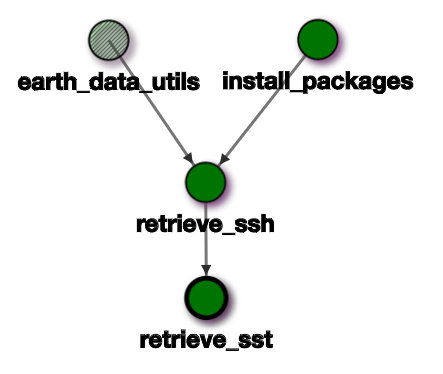

Check workflow id and other metadata using `detail_workflow`.

In [27]:
gw.detail_workflow("kr2novmm4i9i27z5adyj")

WorkflowId: kr2novmm4i9i27z5adyj
+----------------------+-------------------------+-------------+--------+---------------+
| Workflow Id          | Name                    | Description | Owner  | Confidential? |
+----------------------+-------------------------+-------------+--------+---------------+
| kr2novmm4i9i27z5adyj | earth_data_cloud_clinic |             | 111111 | FALSE         |
+----------------------+-------------------------+-------------+--------+---------------+


## 5. Run workflow

The follow line will execute the workflow on the provided host. `100001` means localhost. You can use `gw.detail_host("100001")` to check the details.

It will prompt a password input field to ask for password of the target host. If you don't know your default password of localhost, please run `gw.reset_password()`. 

In [32]:
gw.run_workflow(workflow_id='kr2novmm4i9i27z5adyj', host_list='100001')

Enter password for host - 100001:  ········


Running workflow kr2novmm4i9i27z5adyj
The workflow has been kicked off.
History Id: svx32gpq6x3xmqkorm
Waiting for it to finish
> Start to run process: ru79i2
> Fnished process: ru79i2 - history: zg6v1hy042k - Status: Done
> Start to run process: e57twj
> Fnished process: e57twj - history: o2qf88jyh2f - Status: Done
> Start to run process: nlsntt
> Fnished process: nlsntt - history: fk604fwceda - Status: Done
Total time cost: 104 seconds
Execution is over. Final status: Done.


## 6. Check workflow history

From the log, we can see the workflow completed successfully after running all the four member processes. The final process run's history id is `ohvdmvpfy1m`. We can use `show_history` to check.

In [33]:
## Get Results by Checking History
gw.show_history("fk604fwceda")

+-------------+--------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

From the history, we can see the result image location is at `/Users/joe/geoweaver_plot_sst.png`. Let's display it here.

## 7. Display sea surface temperature data

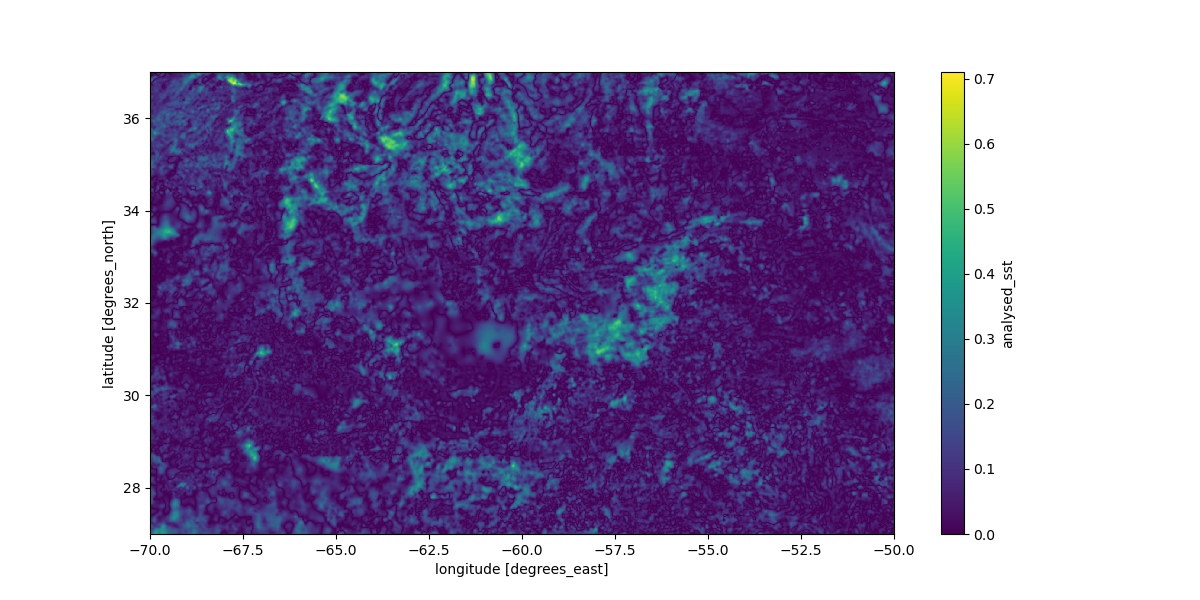

In [34]:
display(Image(filename=os.path.join(home_dir, 'geoweaver_plot_sst.png')))

Bingo! The image is successfully retrieved by the workflow and the data in xarray is rendered and saved to a local png file. The workflow runs with no errors and the replication succeeded. 

## 8. Edit the process to change date range

Replicating is only the start. We always want to change the code and make it work for our purposes. Here we will demonstrate how to change the code in the workflow. 

First, let's list all the processes in the workflow:

In [35]:
gw.list_processes_in_workflow(workflow_id='kr2novmm4i9i27z5adyj')

,title,id
0,earth_data_utils,wttkvt-GJjq8
1,install_packages,ru79i2-VCNCv
2,retrieve_sst,nlsntt-zMUba
3,retrieve_ssh,e57twj-ECmak


You can see the ids are a little different with dashes in the middle of them. That is because we need to distinguish the processes in the workflow as there might be same processes called multiple times in one workflow. 

The original process id is just the first part. For example, the process id of `retrieve_sst` is `nlsntt`. 

Copy that id and use `get_code_for_process` function to get current code.

In [36]:
gw.get_process_code('nlsntt')

'from earth_data_utils import *\n\ndef search_and_get_sst():\n  auth_earthaccess()\n  results = earthaccess.search_data(\n      short_name=sst_short_name,\n      cloud_hosted=True,\n      temporal=("2021-07-01", "2021-07-02"),\n  )\n  print("found results: ", results)\n  return results\n\ndef plot_subset(ds_subset):\n  ds_subset.plot(figsize=(12,6), x=\'lon\', y=\'lat\')\n  home_dir = os.path.expanduser(\'~\')\n  \n  file_name = f"geoweaver_plot_sst.png"\n  save_file_path = os.path.join(home_dir, file_name)\n  plt.savefig(save_file_path)\n  print(f"new figure is saved to {save_file_path}")\n\nwith get_dataset(search_and_get_sst()) as ds:\n  subset = ds["analysed_sst"].sel(lat=slice(27, 37), \n                                lon=slice(-70,-50)).std(\'time\')\n  plot_subset(subset)\n\n'

The code is not formatted correctly. So many `\n` are confusing. 

An easy way is to directly save the code into a local file using function `sync`. 

In [37]:
# write the file to disk to make changes
gw.sync(process_id='nlsntt', local_path=".", direction="download")

Proceeding with download

Wrote file retrieve_sst.py to .


The step above should create a new python file named `retrieve_sst.py` in the same folder as this notebook. 

Open it using any editor and you should see the code as follows: 

```
from earth_data_utils import *

def search_and_get_sst():
  auth_earthaccess()
  results = earthaccess.search_data(
      short_name=sst_short_name,
      cloud_hosted=True,
      temporal=("2021-07-01", "2021-07-02"),
  )
  print("found results: ", results)
  return results

def plot_subset(ds_subset):
  ds_subset.plot(figsize=(12,6), x='lon', y='lat')
  home_dir = os.path.expanduser('~')
  
  file_name = f"geoweaver_plot_{str(uuid.uuid4())}.png"
  save_file_path = os.path.join(home_dir, file_name)
  plt.savefig(save_file_path)
  print(f"new figure is saved to {save_file_path}")

with get_dataset(search_and_get_sst()) as ds:
  subset = ds["analysed_sst"].sel(lat=slice(27, 37), 
                                lon=slice(-70,-50)).std('time')
  plot_subset(subset)
```

Suppose we want the SST data of another region, for example, change the `lat=slice(27, 37)` to `lat=slice(37, 47)`. Make the change in `retrieve_sst.py`, save and close.

Next step is to write the new code back into Geoweaver process using the same `sync` function. This time, the option `direction` should be `upload` meaning we are syncing changes from local file to Geoweaver database. 

In [49]:
# sync changes back to the workflow after editing the file
gw.sync(process_id='nlsntt', local_path='retrieve_sst.py', direction="upload")

Proceeding with upload

Process update was successful


After the step finishes, verify the code change using `get_process_code` again.

In [50]:
gw.get_process_code('nlsntt')

'from earth_data_utils import *\n\ndef search_and_get_sst():\n  auth_earthaccess()\n  results = earthaccess.search_data(\n      short_name=sst_short_name,\n      cloud_hosted=True,\n      temporal=("2021-07-01", "2021-07-02"),\n  )\n  print("found results: ", results)\n  return results\n\ndef plot_subset(ds_subset):\n  ds_subset.plot(figsize=(12,6), x=\'lon\', y=\'lat\')\n  home_dir = os.path.expanduser(\'~\')\n  \n  file_name = f"geoweaver_plot_sst.png"\n  save_file_path = os.path.join(home_dir, file_name)\n  plt.savefig(save_file_path)\n  print(f"new figure is saved to {save_file_path}")\n\nwith get_dataset(search_and_get_sst()) as ds:\n  subset = ds["analysed_sst"].sel(lat=slice(37, 47), \n                                lon=slice(-70,-50)).std(\'time\')\n  plot_subset(subset)\n\n'

Ok, great! You can see the changes are made as the `lat=` has become `37, 47` now. The editing process is complete. 

Now, we just need to rerun the workflow again with the new code.

In [51]:
gw.run_workflow(workflow_id='kr2novmm4i9i27z5adyj', host_list='100001')

Enter password for host - 100001:  ········


Running workflow kr2novmm4i9i27z5adyj
The workflow has been kicked off.
History Id: cf5xnsjounspuhlk9z
Waiting for it to finish
> Start to run process: ru79i2
> Fnished process: ru79i2 - history: arr51wopzbw - Status: Done
> Start to run process: e57twj
> Fnished process: e57twj - history: ppyfc2he31g - Status: Done
> Start to run process: nlsntt
> Fnished process: nlsntt - history: e1ce5zjdm3y - Status: Done
Total time cost: 105 seconds
Execution is over. Final status: Done.


You can see there is a new history id for process `nlsntt`: m3t1sdcsl3k. Check its content to find the result png file location:

In [52]:
gw.show_history("e1ce5zjdm3y")

+-------------+--------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

The new png is generated. Visualize it in jupyter.

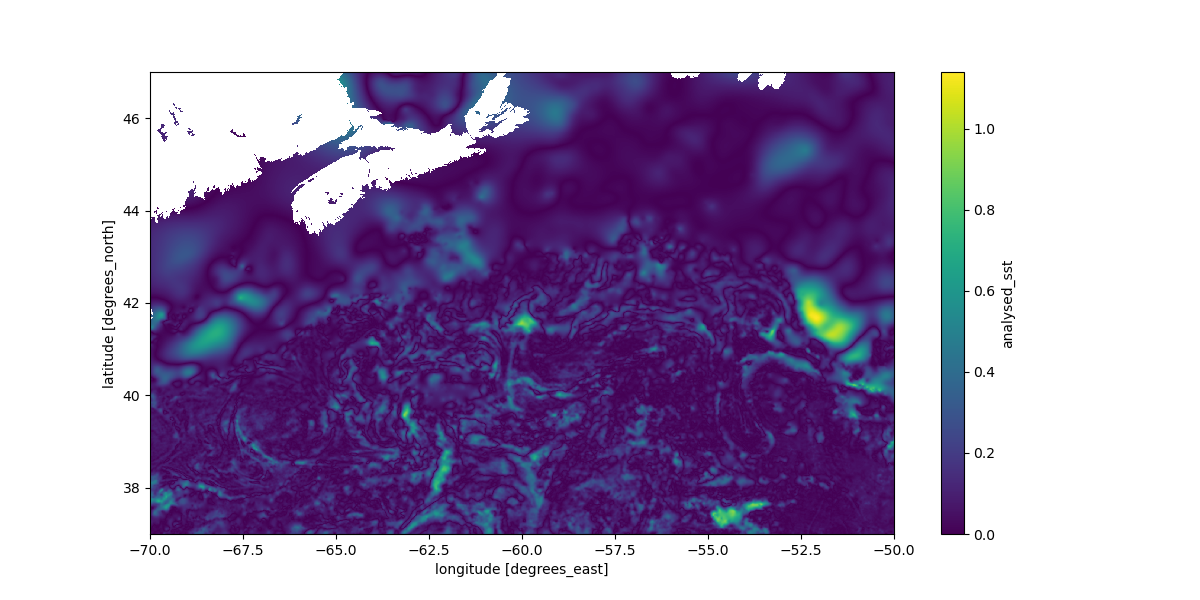

In [53]:
display(Image(filename=os.path.join(home_dir, 'geoweaver_plot_sst.png')))

Nice! The figure looks great with SST texture different from the one displayed above. That means the change of the spatial extent in the process worked great!

The reproducing experiment is done. 

## 9. Check history of specific processes or workflows

In [54]:
# get run history of the process
gw.get_process_history('nlsntt')

,history_id,history_input,history_output,history_begin_time,history_end_time,history_notes,history_process,host_id,indicator
0,e1ce5zjdm3y,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:37:55.840,2023-06-21 07:38:33.137,None,nlsntt,100001,Done
1,afz7j3dzavr,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:33:45.739,2023-06-21 07:34:17.617,None,nlsntt,100001,Done
2,fk604fwceda,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:30:26.691,2023-06-21 07:31:00.588,None,nlsntt,100001,Done
3,uf7ngwa1cnl,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:27:23.479,2023-06-21 07:27:56.093,None,nlsntt,100001,Done
4,jxyo4sjnw7i4dsvt30,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:07:44.443,2023-06-21 07:08:22.248,None,nlsntt,None,Done
5,m3t1sdcsl3k,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 07:02:58.529,2023-06-21 07:03:31.363,None,nlsntt,100001,Done
6,ohvdmvpfy1m,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 04:35:07.128,2023-06-21 04:35:41.058,None,nlsntt,100001,Done
7,55ierovrm5x,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 04:21:51.164,2023-06-21 04:22:26.277,None,nlsntt,100001,Done
8,EcOKe1e6zRlz,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 04:19:36.446,2023-06-21 04:20:10.986,None,nlsntt,None,Done
9,Clldd9m98PAt,from earth_data_utils import *\n\ndef search_a...,You're now authenticated with NASA Earthdata L...,2023-06-21 04:15:33.330,2023-06-21 04:16:09.377,None,nlsntt,None,Done


In [55]:
gw.get_workflow_history('kr2novmm4i9i27z5adyj')

,history_id,history_input,history_output,history_begin_time,history_end_time,history_notes,history_process,host_id,indicator
0,cf5xnsjounspuhlk9z,wttkvt-GJjq8;ru79i2-VCNCv;nlsntt-zMUba;e57twj-...,fwu7qad3kq6;arr51wopzbw;e1ce5zjdm3y;ppyfc2he31g;,2023-06-21 07:36:46.153,2023-06-21 07:37:55.840000000,None,kr2novmm4i9i27z5adyj,100001;,Done
1,dad8g3gkb76stetwix,wttkvt-GJjq8;ru79i2-VCNCv;nlsntt-zMUba;e57twj-...,1c5sjmcrgnj;fx19g9buif9;afz7j3dzavr;jlmxs448gc7;,2023-06-21 07:32:27.062,2023-06-21 07:33:45.739000064,None,kr2novmm4i9i27z5adyj,100001;,Done
2,svx32gpq6x3xmqkorm,wttkvt-GJjq8;ru79i2-VCNCv;nlsntt-zMUba;e57twj-...,zle2vcmqtkh;zg6v1hy042k;fk604fwceda;o2qf88jyh2f;,2023-06-21 07:29:18.002,2023-06-21 07:30:26.691000064,None,kr2novmm4i9i27z5adyj,100001;,Done
3,b70aawjt8z4isn1dwy,wttkvt-GJjq8;ru79i2-VCNCv;nlsntt-zMUba;e57twj-...,617pj1d8nis;zzcxtngjbdu;uf7ngwa1cnl;agb7rrec49u;,2023-06-21 07:26:09.740,2023-06-21 07:26:14.760999936,None,kr2novmm4i9i27z5adyj,100001;,Running
4,bv0wvvajfbrscyj6pm,wttkvt-GJjq8;ru79i2-VCNCv;nlsntt-zMUba;e57twj-...,1h6mwhjgffr;ced80h6vr3r;m3t1sdcsl3k;ed1lczm7cgh;,2023-06-21 07:01:45.800,2023-06-21 07:02:58.528999936,None,kr2novmm4i9i27z5adyj,100001;,Done
...,...,...,...,...,...,...,...,...,...
94,nfuxH8eVz896NHRm1m,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;v2ow93-...,rm0v06cmvuc;8nq18ogdwdi;jhzwkhohmz7;6o2p0699ri...,2023-06-08 16:08:37.776,2023-06-08 16:08:43.665999872,None,kr2novmm4i9i27z5adyj,jf7wuu;,Failed
95,VeCiz4t1MvIQX4i2yN,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;v2ow93-...,15jtnmmliz8;sj2llldbybq;alm4h4h5irw;fs47znp6yg...,2023-06-08 16:08:06.441,2023-06-08 16:08:14.723000064,None,kr2novmm4i9i27z5adyj,jf7wuu;,Failed
96,tFbeUeqkws6xyNbueE,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;v2ow93-...,5gi96g5psgp;7ikdfl3nkyj;zftnvonktj6;aipjqmvzj5...,2023-06-08 16:06:07.658,NaT,None,kr2novmm4i9i27z5adyj,jf7wuu;,Stopped
97,PNFURuqn5MBZk110Fh,wttkvt-GJjq8;yvo1ds-96vns;cgvhiy-BgnXM;v2ow93-...,ro72gckii7a;dnqed48moze;xb7v9iap72l;8heewks755...,2023-06-08 16:05:50.800,NaT,None,kr2novmm4i9i27z5adyj,jf7wuu;,Stopped


## 10. Directly run local python process using PyGeoweaver

In [56]:
gw.run_process(host_id='100001', process_id='nlsntt', sync_path='retrieve_sst.py')

Enter password for host - 100001:  ········


Updating code on workflow with the given file path.

Staring process nlsntt
Execution finished
Total time cost: 41 seconds
+--------------------+--------+---------------------+---------------------+-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+----------------------------------------

Use the same code to visualize the result in a plot. 

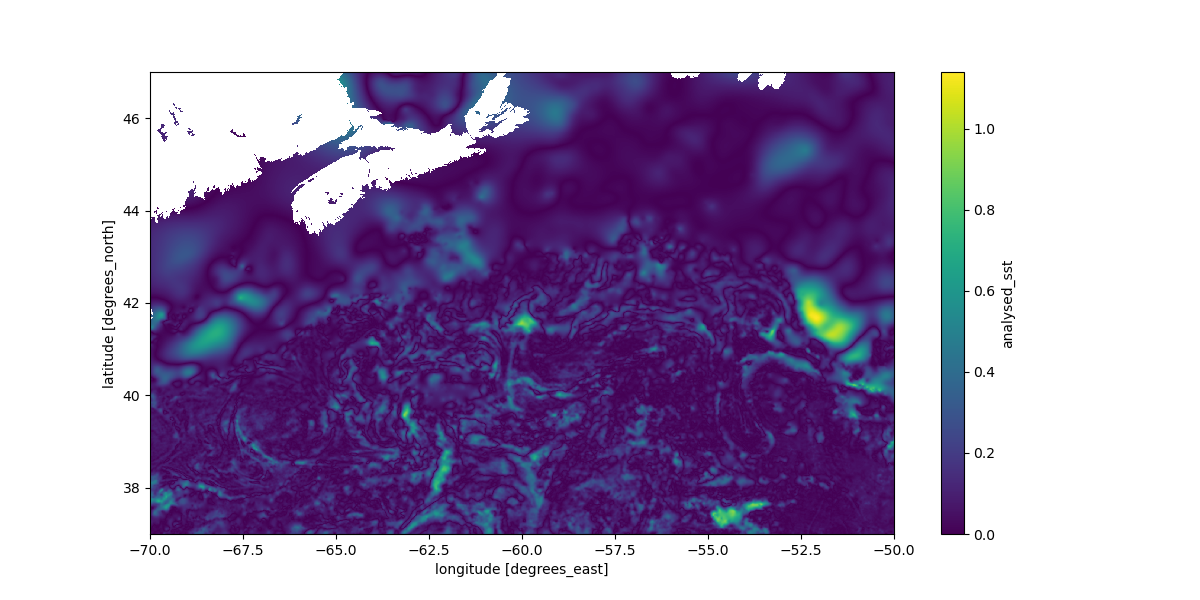

In [57]:
display(Image(filename=os.path.join(home_dir, 'geoweaver_plot_sst.png')))

This image has the same texture as we got in the previous workflow run, and it means running local python directly in pygeoweaver will have the same outputs and won't impact the consistency.

PyGeoWeaver offers significant benefits over manual management of geospatial processes. It ensures that result images remain consistent regardless of file location changes, enables seamless integration with your local Python file, and provides a repeatable and automated process. By utilizing PyGeoWeaver, you can achieve consistent, reproducible, and efficient geospatial analysis, enhancing your productivity and reducing the burden of manual workflow management.

## 11. Geoweaver GUI for creating and editing workflows

There is something not covered in this tutorial about how to create a new workflow in Geoweaver. We usually do that in the Geoweaver GUI. 

Check if you can see Geoweaver GUI using the `show` method like the picture below. 

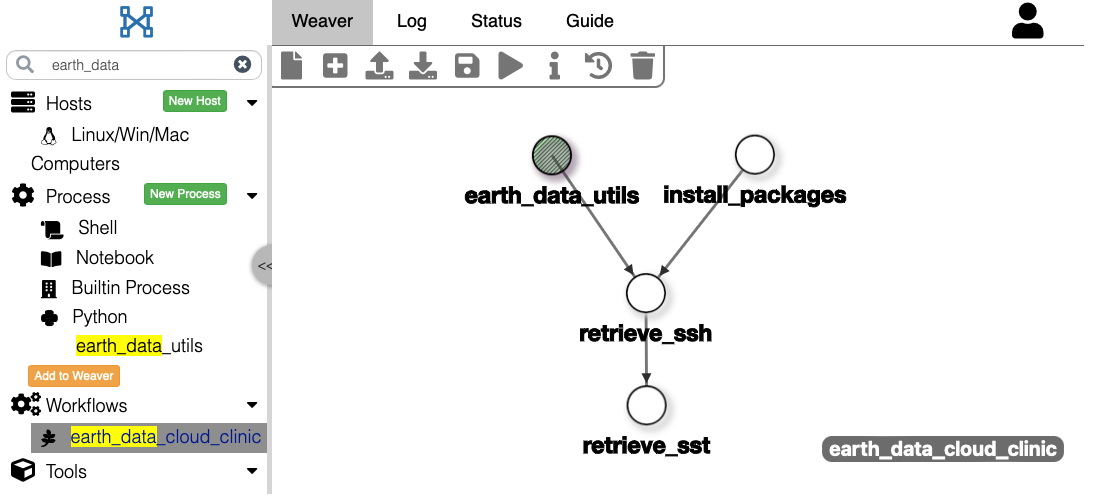

If you're running Jupyter on your localhost, accessing Geoweaver is like a breeze. If you're on your localhost, simply type `gw.show` in a Jupyter cell block or navigate to http://localhost:8070/Geoweaver in your browser, and you're good to go. However, if you're running Jupyter on a remote host, a little extra setup is needed to access Geoweaver.

To access Geoweaver on a remote host, you'll need to proxy the URL to a public address. For instance, if you're using an AWS EC2 instance, replace "localhost" in the URL with the public IP address of your instance. Then enter the modified URL in your browser. Don't forget to add port 8070 to the inbound rule in your EC2 instance's security group settings to ensure a smooth connection.

If you're eager to explore Geoweaver's GUI and dive into detailed tutorials, you can find them at https://esipfed.github.io/Geoweaver/. However, in this notebook, our focus is on demonstrating the incredible capabilities of Geoweaver for replicating and reproducing workflows.

In [19]:
gw.show()

2023-06-21 03:17:27,586 - INFO - enter ipython block
2023-06-21 03:17:27,587 - WARNING - This only works when the Jupyter is visited from localhost!
